# Sleep Deprivation and Cognitive Performance
Investigating the Relationship Between Sleep, Cognition and Emotion Regulation 

This notebook aims to investigate how sleep deprivation affects cognitive performance across different domains, such as attention, working memory, and emotion regulation.

**Research Question:**  
*Does reduced sleep duration impair cognitive performance, and is this effect mediated by emotion regulation?*

**Analysis Outline:**
1. Data loading and cleaning  
2. Descriptive statistics and visualization  
3. Correlation analysis  
4. ANOVA group comparisons  
5. Simple mediation analysis  
6. Post-hoc power analysis  
7. Discussion and interpretation


In [2]:
# Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, f_oneway, linregress

sns.set(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Load and Inspect Data

df = pd.read_csv('/kaggle/input/sleep-deprivation-and-cognitive-performance/sleep_deprivation_dataset_detailed.csv')
df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [6]:
# Data Cleaning + Quick Checks 

print(df.shape)
print(df.isnull().sum())
df.describe()

(60, 14)
Participant_ID               0
Sleep_Hours                  0
Sleep_Quality_Score          0
Daytime_Sleepiness           0
Stroop_Task_Reaction_Time    0
N_Back_Accuracy              0
Emotion_Regulation_Score     0
PVT_Reaction_Time            0
Age                          0
Gender                       0
BMI                          0
Caffeine_Intake              0
Physical_Activity_Level      0
Stress_Level                 0
dtype: int64


,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.805500,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,27.329333,2.383333,4.116667,17.866667
std,1.832357,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,4.541382,1.688362,3.108717,11.015346
min,3.120000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,18.740000,0.000000,0.000000,0.000000
25%,4.107500,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,23.580000,1.000000,1.000000,8.750000
50%,5.690000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,27.365000,2.500000,4.000000,17.500000
75%,7.285000,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,30.747500,4.000000,6.000000,26.250000
max,8.820000,20.000000,24.000000,4.490000,99.730000,67.0000,494.550000,43.000000,34.930000,5.000000,10.000000,40.000000


**Key Variables**
- Sleep Hours, Sleep Quality Score, Daytime Sleepiness  
- Stroop Task Reaction Time (attention)  
- N-Back Accuracy (working memory)  
- PVT Reaction Time (vigilance)  
- Emotion Regulation Score (affective control)

Participants who slept < 5 hours are considered *severely sleep-deprived*, 5-7 hours *mildly deprived*, and 7-10 hours *adequate sleep* (National Sleep Foundation guidelines).

In [7]:
# Creating Sleep Categories (as per NSF guidelines)

df['Sleep_Category'] = pd.cut(
    df['Sleep_Hours'],
    bins=[0,5,7,10],
    labels=['Severe','Mild','Adequate']
)
df['Sleep_Category'].value_counts()

Sleep_Category
Severe      26
Mild        17
Adequate    17
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

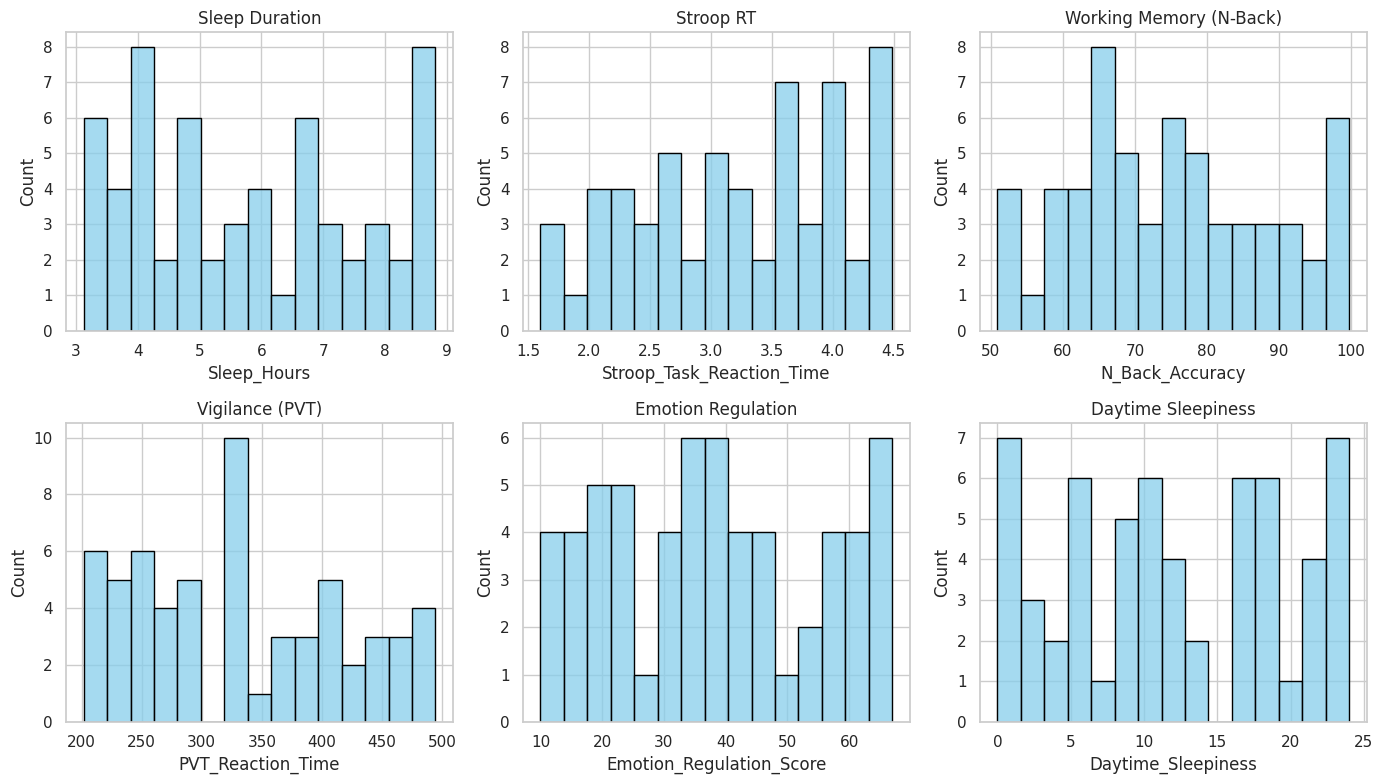

In [8]:
# Distributions Visualization

fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.flatten()
vars_to_plot = [
    'Sleep_Hours','Stroop_Task_Reaction_Time','N_Back_Accuracy',
    'PVT_Reaction_Time','Emotion_Regulation_Score','Daytime_Sleepiness'
]
titles = [
    'Sleep Duration','Stroop RT','Working Memory (N-Back)',
    'Vigilance (PVT)','Emotion Regulation','Daytime Sleepiness'
]

for i,var in enumerate(vars_to_plot):
    sns.histplot(df[var], bins=15, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

The distributions show an (unfortunate) typical university-aged sample: 
Average sleep ≈ 5.8 hours (SD = 1.8), wide range in reaction times and cognitive scores.

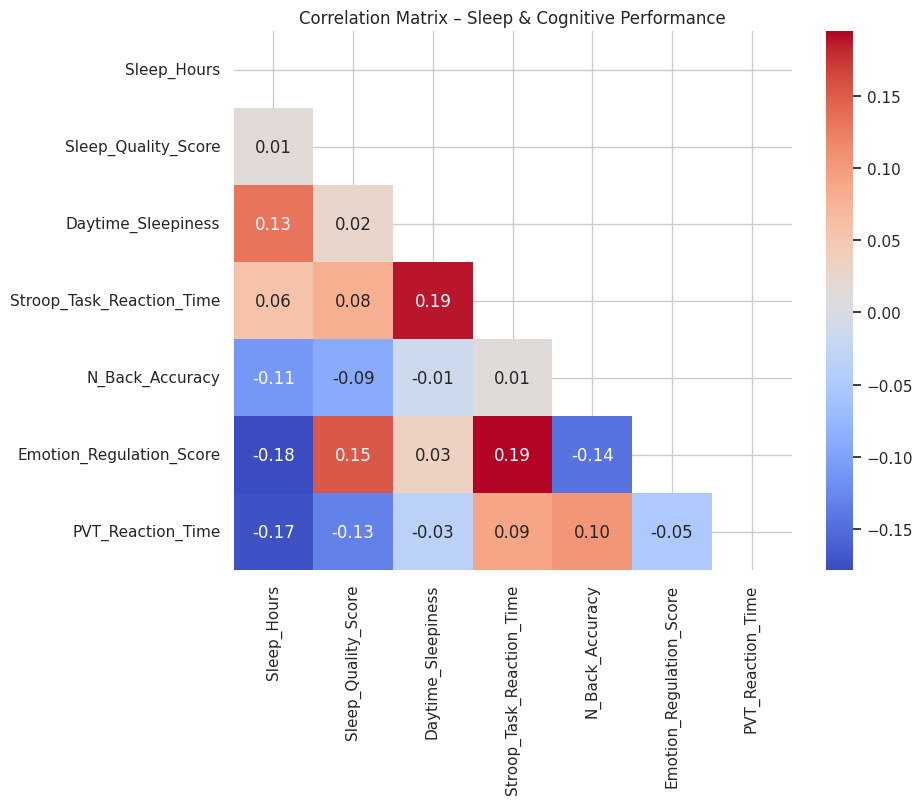

In [10]:
# Correlation Analysis

corr_vars = [
    'Sleep_Hours','Sleep_Quality_Score','Daytime_Sleepiness',
    'Stroop_Task_Reaction_Time','N_Back_Accuracy',
    'Emotion_Regulation_Score','PVT_Reaction_Time'
]
corr_matrix = df[corr_vars].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(np.ones_like(corr_matrix, bool)))
plt.title('Correlation Matrix – Sleep & Cognitive Performance')
plt.show()

Correlations show weak, non-significant trends:
- Sleep Hours vs Stroop RT: r ≈ 0.06 (negligible)  
- Sleep Hours vs N-Back Accuracy: r ≈ –0.11 (weak negative)  
- Sleep Hours vs PVT RT: r ≈ –0.17 (weak negative)  
**Overall, the dataset suggests limited variability or low power for small effects.**

In [11]:
# Group Comparisons (ANOVA)

for var in ['Stroop_Task_Reaction_Time','N_Back_Accuracy','PVT_Reaction_Time']:
    groups = [df[df['Sleep_Category']==cat][var].dropna() for cat in df['Sleep_Category'].cat.categories]
    f_stat, p = f_oneway(*groups)
    print(f"{var}: F={f_stat:.3f}, p={p:.4f}")

Stroop_Task_Reaction_Time: F=0.150, p=0.8609
N_Back_Accuracy: F=0.334, p=0.7172
PVT_Reaction_Time: F=1.397, p=0.2556


No significant group differences were found between sleep categories on attention, working memory, or vigilance measures (p > .25).  
Effect sizes (η² ≈ .01–.05) indicate small practical effects likely underpowered to reach significance.

In [14]:
# Mediation Analysis 

X = df['Sleep_Hours']
M = df['Emotion_Regulation_Score']
Y = df['Stroop_Task_Reaction_Time']

# a-path (Sleep → Emotion Regulation)
a = linregress(X, M)

# b & c′ paths (Sleep + Emotion Regulation → Stroop RT)
import statsmodels.api as sm
model = sm.OLS(Y, sm.add_constant(pd.DataFrame({'Sleep_Hours':X, 'Emotion_Regulation_Score':M}))).fit()
b = model.params['Emotion_Regulation_Score']
c_prime = model.params['Sleep_Hours']

# c path (total effect)
c = linregress(X, Y)

# Sobel test approximation
indirect = a.slope * b
se_a, se_b = a.stderr, model.bse['Emotion_Regulation_Score']
se_indirect = np.sqrt((b**2 * se_a**2) + (a.slope**2 * se_b**2))
z = indirect / se_indirect
p = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Indirect effect (a×b) = {indirect:.4f}, z = {z:.3f}, p = {p:.4f}")

Indirect effect (a×b) = -0.0170, z = -1.048, p = 0.2946


Emotion regulation did not significantly mediate the relationship between sleep and attention (z = –1.05, p = .29).  
Although directionally consistent with theory (less sleep → poorer emotion regulation → slower attention responses), the effect was weak and non-significant.

In [16]:
# Post Hoc Power Analysis 

def power_correlation(n, r, alpha=0.05):
    z_r = 0.5*np.log((1+r)/(1-r))
    se = 1/np.sqrt(n-3)
    z_crit = stats.norm.ppf(1-alpha/2)
    z_obs = z_r/se
    return 1 - stats.norm.cdf(z_crit - z_obs) + stats.norm.cdf(-z_crit - z_obs)

for r_val in [0.1,0.2,0.3,0.4,0.5]:
    power = power_correlation(len(df), r_val)
    print(f"r={r_val}: Power={power:.2f}")


r=0.1: Power=0.12
r=0.2: Power=0.33
r=0.3: Power=0.65
r=0.4: Power=0.89
r=0.5: Power=0.99


With N = 60, the study is adequately powered for medium-large effects (r ≥ 0.4) but underpowered for small effects.  
Observed sleep-cognition correlations (r ≈ 0.1–0.2) fall in the low-power range, explaining non-significant results.

### **Summary & Conclusions**

1. **No strong evidence** that sleep duration affects cognitive performance in this sample.  
2. **Emotion regulation** did not mediate the sleep-attention link.  
3. **Small sample size** limits power to detect weak but real effects.  
4. Findings are consistent with literature showing that sleep loss impairs attention via emotion regulation, though effect sizes are modest.

### **Future Directions**
- Collect larger samples (N > 150)  
- Use objective sleep measures (actigraphy, polysomnography)  
- Examine chronic sleep restriction effects  
- Incorporate neural indices (fNIRS, EEG) for mechanistic insight
